# Concept Mapping using MedCat CDB followed by fuzzy ranking

In [5]:
from medcat.cdb import CDB

from gensim.utils import tokenize


tempDir = '/superbugai-data/yash/temp'
cdb = CDB.load(tempDir + '/SNOMED_cdb.dat')

lines = []
with open(tempDir + '/concept_names.txt') as file:
    lines = [line.rstrip() for line in file]

out_lines = []

for line in lines:
    if line:
        words = [word.lower() for word in tokenize(line)]
        all_cuis = []
        all_preferred_names = []
        for word in words:
            cuis = []
            try:
                cuis = cdb.name2cuis[word]
            except:
                pass
            all_cuis.append(cuis)
            preferred_names = []
            for cui in cuis:
                preferred_names.append(cdb.cui2preferred_name[cui])
            all_preferred_names.append(preferred_names)
        out_lines.append([line, words, all_cuis, all_preferred_names])

import pandas as pd

df = pd.DataFrame(out_lines, columns=['Concept Name', 'Tokens', 'Mapped CUIs', 'Mapped Concepts'])
df.to_csv(tempDir + '/mapped_concept_names.csv', index=False)

In [2]:
import pandas as pd

tempDir = '/superbugai-data/yash/temp'
df = pd.read_csv(tempDir + '/mapped_concept_names.csv')

In [3]:
df[df["Mapped CUIs"] == '[[]]']["Concept Name"].values

array(['Medicine', 'cornstarch', 'cornstarch', '°C', '°F', 'PO', 'SC',
       'IH', 'TP', 'PR', 'IVPCA', 'TD', 'ED', 'NEB', 'SL', 'SUBCUT',
       'DIALYS', 'PIV', 'OU', 'LOCK', 'IT', 'PERIPHNERVE', 'ET', 'IP',
       'VG', 'NAS', 'INTRAPLEURAL', 'PICC', 'DLUVC', 'OD', 'UVC', 'IVCI',
       'IRR', 'IVT', 'UAC', 'INTRAVITREAL', 'BU', 'OG', 'TT', 'SCPUMP',
       'IVS', 'ND', 'DLPICC', 'CVL', 'INTRAPERICARDIAL', 'AERO',
       'INTRACORPOREAL', 'SCPCA', 'PV', 'EDPCA', 'ITPCA', 'DWELL', 'BUN',
       'SvO2', 'ETOH', 'Height', 'PCWP', 'QTc', 'ADENOVIRUS',
       'RHINOVIRUS', 'Pending', 'Government', 'Medicaid', 'Medicare',
       'Private', 'bpm', 'GPL', 'hrs', 'MPL', 'sec', 'U', 'Diabetes',
       'ASIAN', 'PSYCHOSES', 'SpO2 [%]', 'RIC', 'EKG', 'Extubation',
       'AVA', 'Vascular', 'REHAB', 'CMED', 'SURG', 'OMED', 'CSURG',
       'NMED', 'VSURG', 'PSURG', 'TSURG', 'NBB'], dtype=object)

In [4]:
(df[df["Mapped CUIs"] == '[[]]'].shape[0] * 100)/df.shape[0]

2.342529932326913

In [5]:
df[10:]

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts
10,Carbidopa Oral Tablet [Lodosyn],"['carbidopa', 'oral', 'tablet', 'lodosyn']","[['1904011000036100', '73579000'], ['260548002...","[['carbidopa', 'Carbidopa'], ['Oral (qualifier..."
11,Acetylcysteine 100 MG/ML,"['acetylcysteine', 'mg', 'ml']","[['1761011000036109', '21423011000036105', '38...","[['acetylcysteine', 'acetylcysteine', 'Acetylc..."
12,Budesonide 0.25 MG/ML,"['budesonide', 'mg', 'ml']","[['1879011000036103', '21307011000036104', '39...","[['budesonide', 'budesonide', 'Budesonide'], [..."
13,Maprotiline,['maprotiline'],[['387180003']],[['Maprotiline']]
14,budesonide,['budesonide'],"[['1879011000036103', '21307011000036104', '39...","[['budesonide', 'budesonide', 'Budesonide']]"
...,...,...,...,...
3837,NMED,['nmed'],[[]],[[]]
3838,VSURG,['vsurg'],[[]],[[]]
3839,PSURG,['psurg'],[[]],[[]]
3840,TSURG,['tsurg'],[[]],[[]]


In [6]:
df.Tokens

0                      ['emergency', 'department']
1                                     ['medicine']
2       ['emergency', 'department', 'observation']
3                    ['nursery', 'well', 'babies']
4                       ['medicine', 'cardiology']
                           ...                    
3837                                      ['nmed']
3838                                     ['vsurg']
3839                                     ['psurg']
3840                                     ['tsurg']
3841                                       ['nbb']
Name: Tokens, Length: 3842, dtype: object

In [7]:
import ast

df["Token Length"] = df.Tokens.apply(lambda x: ast.literal_eval(x)).apply(lambda x: len(x))

In [8]:
df[df["Token Length"] == 19]["Concept Name"]

1084    Ascorbic Acid 226 MG / cuprous oxide 0.8 MG / ...
3350    TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ H...
Name: Concept Name, dtype: object

In [9]:
df["Token Length"].value_counts()

2     706
3     597
4     583
1     516
5     447
6     300
7     203
8     140
9     101
10     83
11     62
13     33
12     32
15     19
14      7
16      6
17      3
19      2
0       1
21      1
Name: Token Length, dtype: int64

<AxesSubplot:>

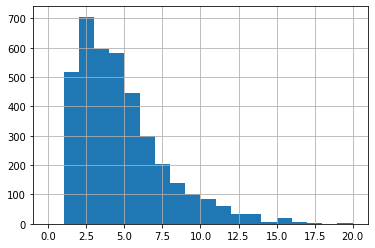

In [10]:
df["Token Length"].hist(bins=range(max(df["Token Length"])))

In [11]:
df[df["Token Length"] > 15]

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Token Length
196,{21 (Ethinyl Estradiol 0.02 MG / norethindrone...,"['ethinyl', 'estradiol', 'mg', 'norethindrone'...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",17
521,{112 (bismuth subsalicylate 262 MG Chewable Ta...,"['bismuth', 'subsalicylate', 'mg', 'chewable',...","[['23172004', '30840011000036104'], [], ['2586...","[['Bismuth', 'bismuth'], [], ['milligram', 'Mi...",16
869,{21 (Ethinyl Estradiol 0.035 MG / ethynodiol 1...,"['ethinyl', 'estradiol', 'mg', 'ethynodiol', '...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",16
901,Ascorbic Acid / Beta Carotene / cuprous oxide ...,"['ascorbic', 'acid', 'beta', 'carotene', 'cupr...","[[], ['34957004'], ['260989008', '52095000'], ...","[[], ['Acid (substance)'], ['Greek letter beta...",16
965,{21 (Ethinyl Estradiol 0.03 MG / norethindrone...,"['ethinyl', 'estradiol', 'mg', 'norethindrone'...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",17
1084,Ascorbic Acid 226 MG / cuprous oxide 0.8 MG / ...,"['ascorbic', 'acid', 'mg', 'cuprous', 'oxide',...","[[], ['34957004'], ['258684004', '427264006', ...","[[], ['Acid (substance)'], ['milligram', 'Mill...",19
2567,BILIARY TACT PROCEDURES EXCEPT ONLY TOTAL CHOL...,"['biliary', 'tact', 'procedures', 'except', 'o...","[[], [], [], [], ['420295001'], ['255619001', ...","[[], [], [], [], ['Only - dosing instruction f...",16
2568,BILIARY TRACT PROCEDURES EXCEPT ONLY TOTAL CHO...,"['biliary', 'tract', 'procedures', 'except', '...","[[], [], [], [], ['420295001'], ['255619001', ...","[[], [], [], [], ['Only - dosing instruction f...",16
2571,BILIARY TRACT PROC EXCEPT ONLY CHOLECYST W OR ...,"['biliary', 'tract', 'proc', 'except', 'only',...","[[], [], [], [], ['420295001'], [], [], ['4205...","[[], [], [], [], ['Only - dosing instruction f...",17
2766,ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATI...,"['ecmo', 'or', 'tracheostomy', 'with', 'mechan...","[[], ['420561004'], ['810551000168104', '69798...","[[], ['Or - dosing instruction fragment'], ['T...",21


In [12]:
import ast
import itertools

df["Mapped CUIs Length"] = df['Mapped CUIs']\
    .apply(lambda cui_list_str: ast.literal_eval(cui_list_str))\
    .apply(lambda cui_list_nested: itertools.chain(*cui_list_nested))\
    .apply(lambda cui_list: [1 if len(cui)>0 else 0 for cui in cui_list])\
    .apply(lambda cui_present: sum(cui_present))
df

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Token Length,Mapped CUIs Length
0,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]",2,1
1,Medicine,['medicine'],[[]],[[]],1,0
2,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]",3,1
3,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier valu...",3,3
4,Medicine/Cardiology,"['medicine', 'cardiology']","[[], ['394579002']]","[[], ['Cardiology']]",2,1
...,...,...,...,...,...,...
3837,NMED,['nmed'],[[]],[[]],1,0
3838,VSURG,['vsurg'],[[]],[[]],1,0
3839,PSURG,['psurg'],[[]],[[]],1,0
3840,TSURG,['tsurg'],[[]],[[]],1,0


In [13]:
df["Mapped CUIs Length"].value_counts()

1     649
3     553
2     444
4     345
6     324
7     238
5     219
0     187
9     170
8     136
14    113
10     93
12     83
11     75
15     61
13     46
17     23
18     21
19     13
16     12
20      8
37      6
21      4
25      4
24      2
36      2
34      2
22      2
28      2
43      1
27      1
26      1
23      1
38      1
Name: Mapped CUIs Length, dtype: int64

<AxesSubplot:>

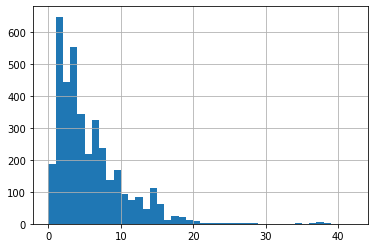

In [14]:
df["Mapped CUIs Length"].hist(bins=range(max(df["Mapped CUIs Length"])))

In [15]:
df[df["Mapped CUIs Length"] > 30]

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Token Length,Mapped CUIs Length
196,{21 (Ethinyl Estradiol 0.02 MG / norethindrone...,"['ethinyl', 'estradiol', 'mg', 'norethindrone'...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",17,37
446,{84 (Ethinyl Estradiol 0.03 MG / Levonorgestre...,"['ethinyl', 'estradiol', 'mg', 'levonorgestrel...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",15,36
499,{21 (Ethinyl Estradiol 0.035 MG / Norethindron...,"['ethinyl', 'estradiol', 'mg', 'norethindrone'...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",15,34
521,{112 (bismuth subsalicylate 262 MG Chewable Ta...,"['bismuth', 'subsalicylate', 'mg', 'chewable',...","[['23172004', '30840011000036104'], [], ['2586...","[['Bismuth', 'bismuth'], [], ['milligram', 'Mi...",16,43
699,{21 (drospirenone 3 MG / Ethinyl Estradiol 0.0...,"['drospirenone', 'mg', 'ethinyl', 'estradiol',...","[['1572891000168103', '31158011000036104', '41...","[['drospirenone', 'drospirenone', 'Drospirenon...",15,37
765,{84 (Ethinyl Estradiol 0.03 MG / Levonorgestre...,"['ethinyl', 'estradiol', 'mg', 'levonorgestrel...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",15,36
869,{21 (Ethinyl Estradiol 0.035 MG / ethynodiol 1...,"['ethinyl', 'estradiol', 'mg', 'ethynodiol', '...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",16,34
965,{21 (Ethinyl Estradiol 0.03 MG / norethindrone...,"['ethinyl', 'estradiol', 'mg', 'norethindrone'...","[[], ['126172005', '21238011000036103', '24090...","[[], ['Estradiol', 'estradiol', 'estradiol'], ...",17,37
1089,{21 (drospirenone 3 MG / Ethinyl Estradiol 0.0...,"['drospirenone', 'mg', 'ethinyl', 'estradiol',...","[['1572891000168103', '31158011000036104', '41...","[['drospirenone', 'drospirenone', 'Drospirenon...",15,37
1113,{1 (aprepitant 125 MG Oral Capsule [Emend]) / ...,"['aprepitant', 'mg', 'oral', 'capsule', 'emend...","[['1814011000036106', '21632011000036103', '40...","[['aprepitant', 'aprepitant', 'Aprepitant'], [...",15,38


In [16]:
import ast
import itertools
from fuzzywuzzy import fuzz
from tqdm import tqdm

matchingConcepts = []
matchingCuis = []
for _, row in tqdm(df.iterrows()):
    mappedConcepts = itertools.chain(*ast.literal_eval(row["Mapped Concepts"]))
    mappedCuis = itertools.chain(*ast.literal_eval(row["Mapped CUIs"]))
    maxScore = 0
    matchingConcept = None
    matchingCui = None
    for mappedConcept, mappedCui in zip(mappedConcepts, mappedCuis):
        matchingScore = fuzz.token_sort_ratio(mappedConcept, row["Concept Name"])
        if matchingScore > maxScore:
            maxScore = matchingScore
            matchingConcept = mappedConcept
            matchingCui = int(mappedCui)
    matchingConcepts.append(matchingConcept)
    matchingCuis.append(matchingCui)
df["Matching Concept"] = matchingConcepts
df["Matching CUI"] = matchingCuis
df

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
3842it [00:01, 2100.70it/s]


,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Token Length,Mapped CUIs Length,Matching Concept,Matching CUI
0,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]",2,1,Emergency,25876001.0
1,Medicine,['medicine'],[[]],[[]],1,0,None,NaN
2,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]",3,1,Emergency,25876001.0
3,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier valu...",3,3,Nursery,161117005.0
4,Medicine/Cardiology,"['medicine', 'cardiology']","[[], ['394579002']]","[[], ['Cardiology']]",2,1,Cardiology,394579002.0
...,...,...,...,...,...,...,...,...
3837,NMED,['nmed'],[[]],[[]],1,0,None,NaN
3838,VSURG,['vsurg'],[[]],[[]],1,0,None,NaN
3839,PSURG,['psurg'],[[]],[[]],1,0,None,NaN
3840,TSURG,['tsurg'],[[]],[[]],1,0,None,NaN


In [19]:
df["Matching Concept"].notna().sum()

3655

In [17]:
df["Matching Concept"].isna().sum()

187

In [18]:
df["Matching Concept"].isna().sum()/df.shape[0] * 100

4.867256637168142

In [40]:
import pandas as pd

tempDir = '/superbugai-data/yash/temp'
snomedDf = pd.read_csv(tempDir + '/preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


In [41]:
mergedDf = pd.merge(df, snomedDf, left_on='Matching CUI', right_on='cui')
mergedDf

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Token Length,Mapped CUIs Length,Matching Concept,Matching CUI,cui,name,name_status,ontologies,description_type_ids,type_ids
0,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]",2,1,Emergency,2.587600e+07,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689
1,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]",3,1,Emergency,2.587600e+07,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689
2,EMERGENCY ROOM,"['emergency', 'room']","[['25876001'], []]","[['Emergency'], []]",2,1,Emergency,2.587600e+07,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689
3,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier valu...",3,3,Nursery,1.611170e+08,161117005,Nursery (finding),P,SNOMED-CT,finding,67667581
4,Medicine/Cardiology,"['medicine', 'cardiology']","[[], ['394579002']]","[[], ['Cardiology']]",2,1,Cardiology,3.945790e+08,394579002,Cardiology (qualifier value),P,SNOMED-CT,qualifier value,7882689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,ELECTIVE,['elective'],[['103390000']],[['Elective']],1,1,Elective,1.033900e+08,103390000,Elective (qualifier value),P,SNOMED-CT,qualifier value,7882689
3201,SURGICAL SAME DAY ADMISSION,"['surgical', 'same', 'day', 'admission']","[['83578000'], ['262126009'], ['258703001', '2...","[['Surgical'], ['Same (qualifier value)'], ['d...",4,4,Same (qualifier value),2.621260e+08,262126009,Same (qualifier value),P,SNOMED-CT,qualifier value,7882689
3202,URGENT,['urgent'],[['103391001']],[['Urgency']],1,1,Urgency,1.033910e+08,103391001,Urgency (qualifier value),P,SNOMED-CT,qualifier value,7882689
3203,Dental - for dental/jaw related admissions,"['dental', 'for', 'dental', 'jaw', 'related', ...","[['738906000'], ['86495002'], ['738906000'], [...","[['Dental'], ['For (qualifier value)'], ['Dent...",6,5,Related,2.620940e+08,262094002,Related (finding),P,SNOMED-CT,finding,67667581


In [42]:
mergedDf.ontologies.value_counts()

SNOMED-CT    3205
Name: ontologies, dtype: int64

In [43]:
mergedDf.description_type_ids.value_counts()

qualifier value            741
substance                  480
organism                   328
AU substance               313
AU qualifier               260
body structure             194
disorder                   169
procedure                  140
physical object            115
morphologic abnormality     69
medicinal product           64
finding                     55
attribute                   52
intended site               51
observable entity           47
ethnic group                28
physical force              21
specimen                    15
basic dose form             11
cell structure               8
environment                  8
cell                         7
trade product                5
person                       5
administration method        5
event                        4
racial group                 3
regime/therapy               2
social concept               2
disposition                  1
occupation                   1
unit of presentation         1
Name: de